# Machine Learning Engineer Nanodegree
## Introduction and Foundations
## Project: Titanic Survival Exploration

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this introductory project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive. To complete this project, you will need to implement several conditional predictions and answer the questions below. Your project submission will be evaluated based on the completion of the code and your responses to the questions.
> **Tip:** Quoted sections like this will provide helpful instructions on how to navigate and use an iPython notebook. 

# Getting Started
To begin working with the RMS Titanic passenger data, we'll first need to `import` the functionality we need, and load our data into a `pandas` DataFrame.  
Run the code cell below to load our data and display the first few entries (passengers) for examination using the `.head()` function.
> **Tip:** You can run a code cell by clicking on the cell and using the keyboard shortcut **Shift + Enter** or **Shift + Return**. Alternatively, a code cell can be executed using the **Play** button in the hotbar after selecting it. Markdown cells (text cells like this one) can be edited by double-clicking, and saved using these same shortcuts. [Markdown](http://daringfireball.net/projects/markdown/syntax) allows you to write easy-to-read plain text that can be converted to HTML.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
# Import supplementary visualizations code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
 
data = pd.read_csv('titanic_data.csv')

# Print the first few entries of the RMS Titanic data
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [2]:



# Show the new dataset with 'Survived' removed
display(data.head())

data.isnull().sum()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
#Filling Nan values for Cabin & Restricting to One Letter

data['Cabin'] = data['Cabin'].fillna('N')
data['Cabin'] = data['Cabin'].apply(lambda x: x[0])

#Filling Nan values with median of group Pclass and Sex for Age

grouped_sex_class = data.groupby(['Sex', 'Pclass'])

#function to impute median

def impute_median(group):
    return group.fillna(group.median())

data['Age'] = grouped_sex_class['Age'].transform(impute_median)
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.45,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,N,Q


In [4]:
#Filling Nans for Embarked

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


#Dropping Name and Ticket, Passenger Id

data = data.drop('Name', axis =1)
data = data.drop('Ticket', axis = 1)
data = data.drop('PassengerId', axis =1)

#Combining SibSp and Parch and dropping the individuals

data['Family'] = data['SibSp'] + data['Parch']

data = data.drop('SibSp', axis =1)
data = data.drop('Parch', axis =1)



#print(data.loc[data['Fare'] == 0])
data['Fare'] = data['Fare'].replace([0], data['Fare'].median())
print(data.loc[data['Fare'] == 0])

Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, Fare, Cabin, Embarked, Family]
Index: []


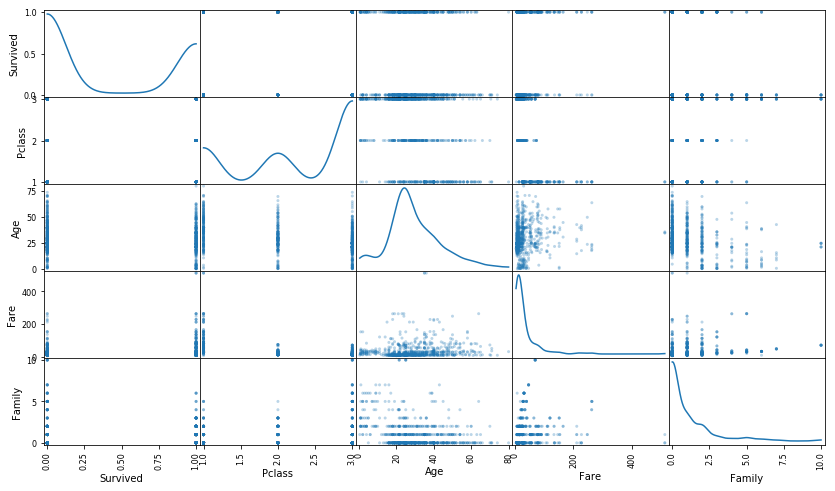

In [5]:
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [6]:
#Use np.log to transform skewed data to more normal distribution
data['Fare'] = np.log(data['Fare'])


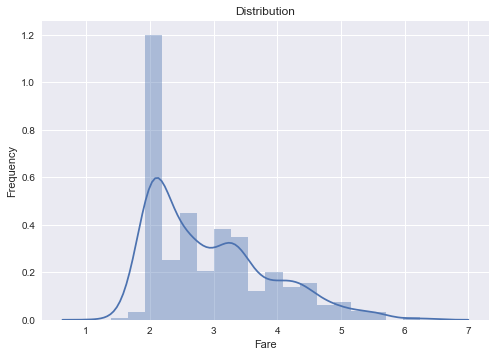

In [7]:

import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
plt.ylabel('Frequency')
plt.title('Distribution')
sns.distplot(data['Fare']);

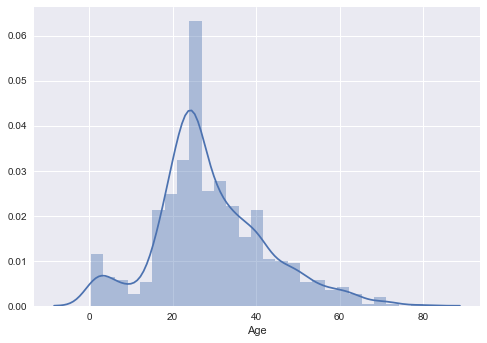

In [8]:
sns.distplot(data['Age']);

In [9]:
print(data.count())
print(data)
#Removing outliers
#Calculate Q1, 25th percentile of data for Age

def removing_outliers(data, features):
    
    
    for feature in features:
        #print("Processing :" + feature)
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(data[feature], 25)
        print("Q1")
        print(Q1)
        # TODO: Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(data[feature], 75)
        print("Q3")
        print(Q3)
        # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = 1.5 * (Q3-Q1)
        print("Step")
        print(step)
        
        data = data[data.loc[:,feature] <= Q3 + step] 
        print("Q3 + step value:" + str(Q3 + step) )
        print("data after Q3 Step")
        print(data.count())
        data = data[data.loc[:,feature] >= Q1 - step]
        print("Q1 - step value:" + str(Q1 - step) )
        print("data after Q1 Step")
        print(data.count())
        
        
    return data
    
data = removing_outliers(data, ["Age", "Fare"])
print(data.count())

#new_data = data[data.loc[:,'Age'] < Q3 + outliers] 
#new_data = new_data[new_data.loc[:,'Age'] > Q1 - outliers]
#print(new_data.count())

#new_data = data[data.loc[:,'Age'] < Q3 + outliers] 
#new_data = new_data[new_data.loc[:,'Age'] > Q1 - outliers]


Survived    891
Pclass      891
Sex         891
Age         891
Fare        891
Cabin       891
Embarked    891
Family      891
dtype: int64
     Survived  Pclass     Sex   Age      Fare Cabin Embarked  Family
0           0       3    male  22.0  1.981001     N        S       1
1           1       1  female  38.0  4.266662     C        C       1
2           1       3  female  26.0  2.070022     N        S       0
3           1       1  female  35.0  3.972177     C        S       1
4           0       3    male  35.0  2.085672     N        S       0
5           0       3    male  25.0  2.135148     N        Q       0
6           0       1    male  54.0  3.948596     E        S       0
7           0       3    male   2.0  3.048088     N        S       4
8           1       3  female  27.0  2.409941     N        S       2
9           1       2  female  14.0  3.403555     N        C       1
10          1       3  female   4.0  2.815409     G        S       2
11          1       1  female  

In [10]:
#COnvert categorical data
data = pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,Fare,Family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1.981001,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,1,1,38.0,4.266662,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,3,26.0,2.070022,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,1,35.0,3.972177,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,3,35.0,2.085672,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [11]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = data['Survived']
data = data.drop('Survived', axis = 1)

In [12]:
from sklearn.model_selection import train_test_split
#  Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(data, outcomes, test_size = 0.2, random_state=0)

In [13]:
#STandardize features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)







In [17]:
from sklearn.metrics import accuracy_score

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

model_gbr = GradientBoostingClassifier(n_estimators=250)
params = {'max_depth': [1,3,4,8],
         
         
         'learning_rate':[0.05,0.1,0.2],
        'min_samples_split':[10,50]}
clf = GridSearchCV(model_gbr, params, cv=10)

clf = clf.fit(X_train, y_train)

print(clf.best_estimator_)

y_pred = clf.predict(X_test)
scoring = accuracy_score(y_test, y_pred)
print(scoring)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=50, min_weight_fraction_leaf=0.0,
              n_estimators=250, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
0.829411764706
